# *Исследование продаж компьютерных игр*

### *Описание проекта*

Анализ данных по продажам игр в разных регионах на различных платформах. Данные включают в себя информацию о названиях игр, дате выпуска, жанре, платформе размещения, регионе, рейтинге ESRB, оценке критиков и пользователей, количестве проданных копий, выручке по продажам


### *План исслелования*

1. Обзор и предобработка данных: 
- Посмотреть общую информацию о данных
- Привести назныния столбцов к общему виду
- Выявить и устранить дупликаты и пропуски (если это необходимо)
- Изменить тип данных при необходимости

2. Исследовательский анализ
- Подсчитать продажи по всем регионам
- Подсчитать количества игр по годам
- Анализ продаж игр по платформам
- Построить прогноз на 2017 год
- Определить актуальный период платформы (время жизни) 
- Анализ по глобальным продажам, выявление корреляций 

3. Составление портрета пользователя для каждого региона 
- Группировка данных по регионам и продажам о топ-5 платформам
- Исследование влияние рейтинга ESRB на продажи

4. Проверка гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

5. Общий вывод

In [4]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
try: 
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

## *Обзор и предобработка данных*

План этапа:
- Посмотреть общую информацию о данных
- Привести назныния столбцов к общему виду
- Выявить и устранить дупликаты и пропуски (если это необходимо)
- Изменить тип данных при необходимости

In [6]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.columns = map(str.lower, data.columns)

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Обзор столбцов

In [10]:
# смотрим столбец name

print('кол-во пропусков:', data['name'].isna().sum())

try:
    print('мин значение:', data['name'].min(), 'макс значение:', data['name'].max())
    print()
except:
    pass

print(data['name'].describe())
print()

print(data['name'].value_counts())

кол-во пропусков: 2
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64


In [11]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
# удалим строки в пропусками в столбце названия игры - всего две строчки - незначительные потери 

data.drop(index = [659, 14244], inplace = True)

In [13]:
# смотрим столбец platform

print('кол-во пропусков:', data['platform'].isna().sum())

print('мин значение:', data['platform'].min(), 'макс значение:', data['platform'].max())
print()

print(data['platform'].describe())
print()

print(data['platform'].value_counts())

кол-во пропусков: 0
мин значение: 2600 макс значение: XOne

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


In [14]:
# смотрим столбец year_of_release

print('кол-во пропусков:', data['year_of_release'].isna().sum())

print('мин значение:', data['year_of_release'].min(), 'макс значение:', data['year_of_release'].max())
print()

print(data['year_of_release'].describe())
print()

print(data['year_of_release'].value_counts())

кол-во пропусков: 269
мин значение: 1980.0 макс значение: 2016.0

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64


In [15]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [16]:
# Приводим значения в столбце к целочисленному типу

# удалим пропуски в столбце года релиза т.к в дальнейшем это важные показатели 
# и заполнить их средним или имедианным не считается в нашем случае правильным решением 

data.dropna(subset = ['year_of_release'], inplace = True)
data['year_of_release'] = data['year_of_release'].astype('int64')

In [17]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983], dtype=int64)

In [18]:
# Проверка

data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [19]:
# смотрим столбец genre

print('кол-во пропусков:', data['genre'].isna().sum())

print('мин значение:', data['genre'].min(), 'макс значение:', data['genre'].max())
print()

print(data['genre'].describe())
print()

print(data['genre'].value_counts())



кол-во пропусков: 0
мин значение: Action макс значение: Strategy

count      16444
unique        12
top       Action
freq        3307
Name: genre, dtype: object

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64


In [20]:
# смотрим столбец na_sales

print('кол-во пропусков:', data['na_sales'].isna().sum())

print('мин значение:', data['na_sales'].min(), 'макс значение:', data['na_sales'].max())
print()

print(data['na_sales'].describe())
print()

print(data['na_sales'].value_counts())



кол-во пропусков: 0
мин значение: 0.0 макс значение: 41.36

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

0.00     4449
0.02      562
0.03      554
0.04      543
0.05      536
         ... 
5.39        1
3.03        1
3.56        1
2.82        1
41.36       1
Name: na_sales, Length: 401, dtype: int64


Особенностей, требующих дополнительного внимания не обраружил

In [21]:
# смотрим столбец eu_sales

print('кол-во пропусков:', data['eu_sales'].isna().sum())

print('мин значение:', data['eu_sales'].min(), 'макс значение:', data['eu_sales'].max())
print()

print(data['eu_sales'].describe())
print()

print(data['eu_sales'].value_counts())


кол-во пропусков: 0
мин значение: 0.0 макс значение: 28.96

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

0.00     5766
0.01     1467
0.02     1290
0.03      911
0.04      702
         ... 
1.52        1
5.75        1
2.17        1
2.78        1
28.96       1
Name: eu_sales, Length: 307, dtype: int64


Особенностей, требующих дополнительного внимания так же не обраружил

In [22]:
# смотрим столбец jp_sales

print('кол-во пропусков:', data['jp_sales'].isna().sum())

print('мин значение:', data['jp_sales'].min(), 'макс значение:', data['jp_sales'].max())
print()

print(data['jp_sales'].describe())
print()

print(data['jp_sales'].value_counts())

кол-во пропусков: 0
мин значение: 0.0 макс значение: 10.22

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

0.00    10300
0.02      733
0.01      697
0.03      540
0.04      391
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: jp_sales, Length: 244, dtype: int64


Особенностей, требующих дополнительного внимания так же не обраружил и здесь

In [23]:
# смотрим столбец other_sales

print('кол-во пропусков:', data['other_sales'].isna().sum())

print('мин значение:', data['other_sales'].min(), 'макс значение:', data['other_sales'].max())
print()

print(data['other_sales'].describe())
print()

print(data['other_sales'].value_counts())

кол-во пропусков: 0
мин значение: 0.0 макс значение: 10.57

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

0.00    6492
0.01    3398
0.02    1596
0.03     910
0.04     641
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: other_sales, Length: 155, dtype: int64


In [24]:
# смотрим столбец critic_score

print('кол-во пропусков:', data['critic_score'].isna().sum())

print('мин значение:', data['critic_score'].min(), 'макс значение:', data['critic_score'].max())
print()

print(data['critic_score'].describe())
print()

print(data['critic_score'].value_counts())

кол-во пропусков: 8461
мин значение: 13.0 макс значение: 98.0

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
20.0      3
29.0      3
21.0      1
17.0      1
13.0      1
Name: critic_score, Length: 81, dtype: int64


In [25]:

data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [26]:
# смотрим столбец user_score

print('кол-во пропусков:', data['user_score'].isna().sum())

try:
    print('мин значение:', data['user_score'].min(), 'макс значение:', data['user_score'].max())
    print()
except:
    pass

print(data['user_score'].describe())
print()

print(data['user_score'].value_counts())

кол-во пропусков: 6605
count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


In [28]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [25]:
# Поскольку tbd не является оценкой, разумно заменить такие значения на значение пропуска 

data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

In [26]:
# Приводим столбец к дробном увиду

data['user_score'] = data['user_score'].astype('float64')

In [27]:
# Смотрим столбец rating

print('кол-во пропусков:', data['rating'].isna().sum())

try:
    print('мин значение:', data['rating'].min(), 'макс значение:', data['rating'].max())
    print()
except:
    pass

print(data['rating'].describe())
print()

print(data['rating'].value_counts())

кол-во пропусков: 6676
count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64


In [28]:
# Поскольку пропуски означают отсутствие рейтинга, целесообразно для отчетов так их и обозначить

data['rating'] = data['rating'].fillna('нет рейтинга')
print('кол-во пропусков:', data['rating'].isna().sum())

кол-во пропусков: 0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [30]:
print('кол-во дупликатов:', data.duplicated().sum())
print('кол-во пропусков: \n', data.isna().sum())

кол-во дупликатов: 0
кол-во пропусков: 
 name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


### *Вывод этапа обзора и предобработки данных*

1. наименования стоблцов приведены к нижнему регистру
2. удалены строки с пропусками данных в столбцах name, rating и year_of_release
3. значения столбца user_score, равные 'tbd' заменено на значения пропусков nan
4. пропуски значений столбца rating заменены на значение 'нет рейтинга'


In [31]:
# Посмотрим, что у нас осталось

temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-во NaN 0 , процент NaN 0.0 %
-------

## **Исследовательский анализ**

План этапа:
- Подсчитать продажи по всем регионам
- Подсчитать количества игр по годам
- Анализ продаж игр по платформам
- Построить прогноз на 2017 год
- Определить актуальный период платформы (время жизни) 
- Анализ по глобальным продажам, выявление корреляций 

### Подсчет продаж по всем регионам 

In [32]:
# Подсчет продаж по всем регионам

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'].head()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

### Посчет выпуска игр в разные годы

In [33]:
games_per_year = data.groupby('year_of_release')[['name']].agg('count').reset_index()
games_per_year.columns = ['year_of_release', 'sum_games']
games_per_year

,year_of_release,sum_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


[Text(0.5, 0, 'Год релиза'),
 Text(0, 0.5, 'Количество игр'),
 Text(0.5, 1.0, 'Распределение количества игр по годам')]

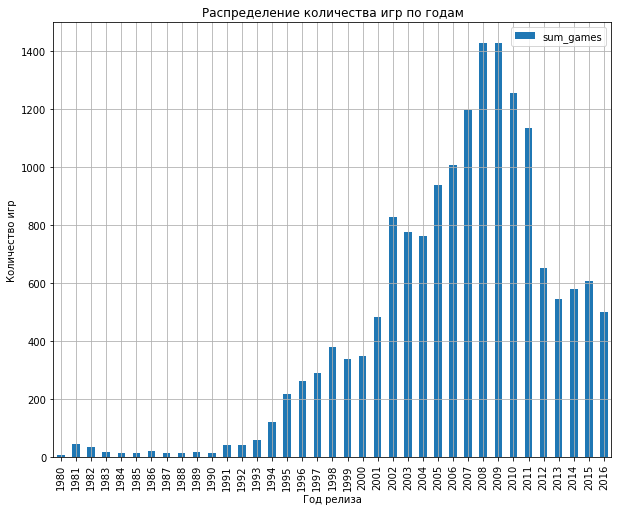

In [34]:
games_per_year.plot.bar(x = 'year_of_release', y = 'sum_games', grid = True, figsize = (10, 8)).set(
    xlabel = 'Год релиза', ylabel = 'Количество игр', title = 'Распределение количества игр по годам')

*Вывод по анализу выпуска игр по годам:*

Судя по графику, кол-во игр, выпущенных до 1990 года можно считать незначительным, прорывной скачок в развитии компьютерной графики проищошел в середине 1990х, когда культура видеоигр перешла от 2D платформеров к 3D играм. Так началась эпоха разработки компьютерных игр, пик которой пришелся на 2008-2009 годы

Думаю, что данных об играх до 1990 года незначительны и от них можно смело отказаться

In [35]:

data = data.query('year_of_release > 1990')

### Анализ продаж игр по платформам

In [36]:
# Группируем данные по платформам и продажам

platform_info = data.groupby('platform')['total_sales'].agg(['count', 'sum']).sort_values(
    by='sum', ascending = False).reset_index()
platform_info.columns = ['platform', 'game_sum', 'game_sales']
platform_info

,platform,game_sum,game_sales
0,PS2,2127,1233.56
1,X360,1232,961.24
2,PS3,1306,931.34
3,Wii,1286,891.18
4,DS,2120,802.76
5,PS,1190,727.58
6,PS4,392,314.14
7,GBA,811,312.88
8,PSP,1193,289.53
9,3DS,512,257.81


<AxesSubplot:ylabel='game_sales'>

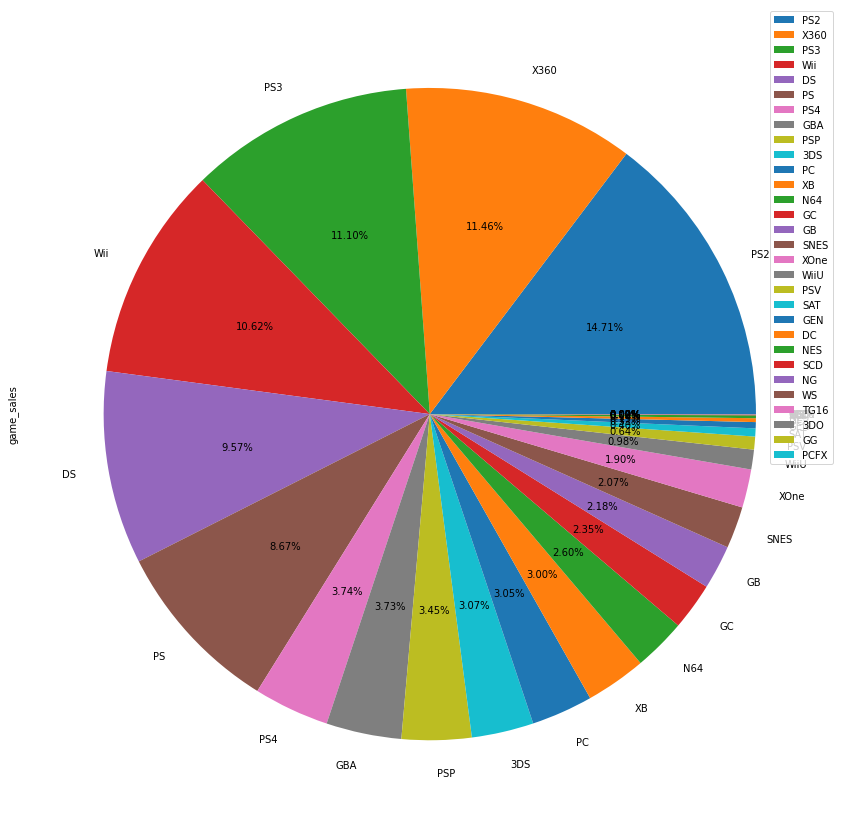

In [37]:
# Строим круговую диагрмму распределения (процентное соотношение) продаж игр по платформам

platform_info.plot(kind = 'pie', y = 'game_sales', figsize = (15,15), autopct='%.2f%%', labels = platform_info['platform'])
                         

Выделяются топ 6 платформ по продажам игр: PS, PS2, PS3, DS, Wii, X360. 
Стоит отметить, что PS, PS2 и PS3 - это все продукт одной компании Sony - консоль Sony Playstation - просто разные поколения
таким образом, около 35% всех продаж приходится на компанию Sony, а точнее на ее продукт серии Sony Playstation

[Text(0.5, 0, 'Платформа'), Text(0, 0.5, 'Продажи на платформе')]

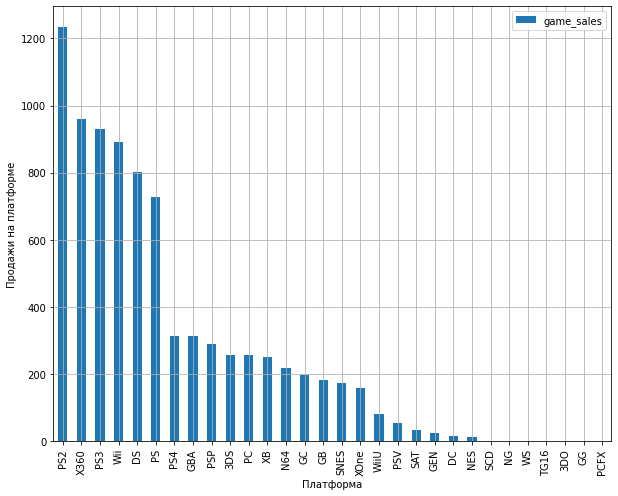

In [38]:
# Строим график объема продаж по платформам

platform_info.plot.bar(x = 'platform', y = 'game_sales', grid = True,
                    figsize = (10,8)).set(xlabel = 'Платформа', ylabel = 'Продажи на платформе')


Топ продаж приходится на платформу PS2 - немало было выпущено хороших игр на ней за все годы, что закрепило за ней статус "народной консоли"На мнрафике виден резкий спад продаж, думаю, объяснить его можно тем, что с выходом нового поколения консили Sony - PS4, было не так много игр + цена на них была напорядок выше предыдущего поколения платформы игрGBA - Game Boy Advanced - портативная консоль - уже отживала свое и перестала пользоваться в какой то момент своей популярностью,так же как PSP и другие портативные консоли

Строим диаграмму количества игр на платформах

[Text(0.5, 0, 'Платформа'), Text(0, 0.5, 'Количество игр')]

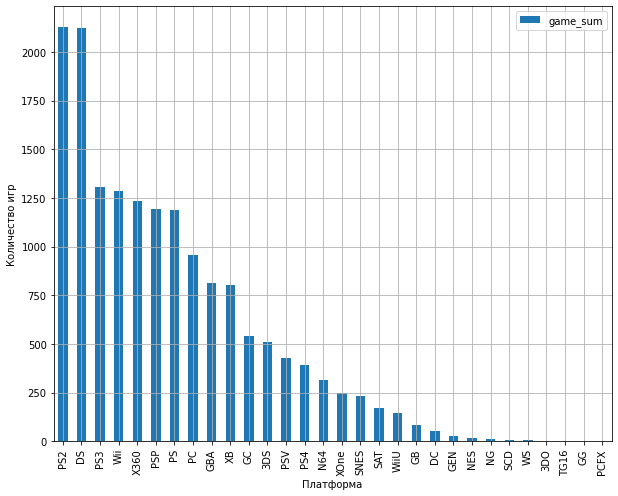

In [39]:

platform_info.sort_values(by = 'game_sum', ascending = False).plot.bar(
                    x = 'platform', y = 'game_sum', grid = True,
                    figsize = (10,8)).set(xlabel = 'Платформа', ylabel = 'Количество игр')

Пик выпущенных игр приходится на две платформы - PS2 и DS, далее идет реский спад и стабильное угасающее распределение от PS3, Wii, X360 и так далее Стоит так же отметить, что у Sony имеется платформа PSV - Sony Playstation Vita - еще одна портативня консоль, выпущеная после PSP. Хоть и игр на нее было выпущено примерно столько же, как и на стационарную консоль PS4, продажи по этой платформе, на первый взгляд, можно считать провальными

Смотрим топ-5 продаж по платформам

In [40]:

top_5_platform = platform_info.head(5)['platform']
top_5_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
Name: platform, dtype: object

In [41]:
# query запрос через внешнюю переменную

top_year_of_release = data.query('platform in @top_5_platform and year_of_release >= 1990').pivot_table(
                       index ='year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')

top_year_of_release

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41
2008,145.31,53.90,118.52,171.32,135.26


[Text(0.5, 0, 'Год продаж'), Text(0, 0.5, 'Объем продаж')]

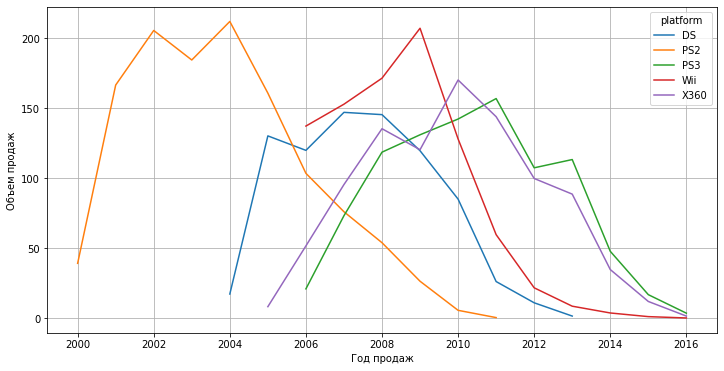

In [42]:
# Смотрим динамику продаж топ-5 платформ

top_year_of_release.plot(grid = True, figsize = (12, 6)).set(xlabel = 'Год продаж', ylabel = 'Объем продаж')

In [43]:
top_year_of_release.info()
top_year_of_release.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2000 to 2016
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DS      10 non-null     float64
 1   PS2     12 non-null     float64
 2   PS3     11 non-null     float64
 3   Wii     11 non-null     float64
 4   X360    12 non-null     float64
dtypes: float64(5)
memory usage: 816.0 bytes


platform,DS,PS2,PS3,Wii,X360
count,10.000000,12.000000,11.000000,11.000000,12.000000
mean,80.276000,102.796667,84.667273,81.016364,80.103333
std,59.796231,79.405729,54.637565,79.136330,57.484408
min,1.540000,0.450000,3.600000,0.180000,1.520000
25%,19.497500,35.977500,34.360000,6.170000,29.045000
50%,102.280000,89.705000,107.360000,59.650000,91.995000
75%,127.557500,170.900000,124.725000,144.960000,124.032500
max,146.940000,211.810000,156.780000,206.970000,170.030000


Смотрим детально объем продаж по выбранной платформе 'PS2'

[Text(0.5, 0, 'Год релиза'), Text(0, 0.5, 'Объем продаж, млн копий')]

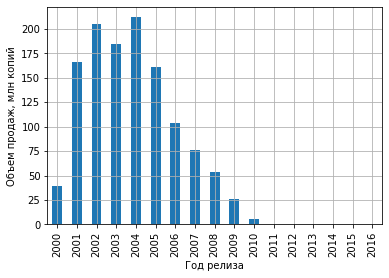

In [44]:

top_year_of_release['PS2'].plot.bar(
    x = 'year_of_release', y = 'total_sales', grid = True).set(
    xlabel = 'Год релиза', ylabel = 'Объем продаж, млн копий')

Явный лидер среди продаж по платформам, консоль выпещенная в 2000 году, стала популярна уже через год и сразу занимала топ продаж все следующие 5 лет, вплоть до 2005 года

Смотрим детально объем продаж по выбранной платформе 'PS3'

[Text(0.5, 0, 'Год релиза'), Text(0, 0.5, 'Объем продаж, млн копий')]

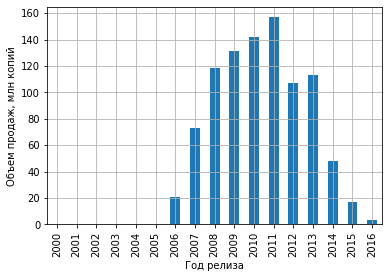

In [45]:

top_year_of_release['PS3'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid = True).set(
    xlabel = 'Год релиза', ylabel = 'Объем продаж, млн копий')

Консоль следующего поколения, могла бы занять место предшественника по продажам, однако в тот же период у нее появился серьезный конкурент от Microsoft - X360

Смотрим детально объем продаж по выбранной платформе 'X360'

[Text(0.5, 0, 'Год релиза'), Text(0, 0.5, 'Объем продаж, млн копий')]

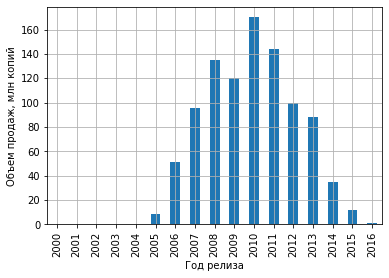

In [46]:

top_year_of_release['X360'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid = True).set(
    xlabel = 'Год релиза', ylabel = 'Объем продаж, млн копий')

Старт продаж в 2005 и затем быстрый рост за пару лет привели к высоким показателям по продаже на следующие 5 лет, но все не так просто: приходится тесно конкурировать с PS2, что так же хорошо видно напервом графике динамики продаж

Смотрим детально объем продаж по выбранной платформе 'DS'

[Text(0.5, 0, 'Год релиза'), Text(0, 0.5, 'Объем продаж, млн копий')]

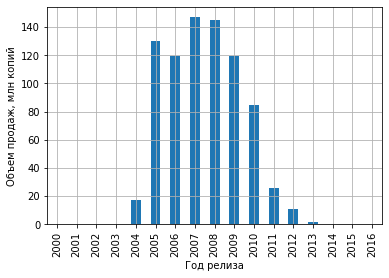

In [47]:

top_year_of_release['DS'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid = True).set(
    xlabel = 'Год релиза', ylabel = 'Объем продаж, млн копий')

Резкий старт продаж и сразу достижения пика, который длился 5 лет, вплоть до 2009 года, затем резкий спад продаж

Смотрим детально объем продаж по выбранной платформе 'Wii'

[Text(0.5, 0, 'Год релиза'), Text(0, 0.5, 'Объем продаж, млн копий')]

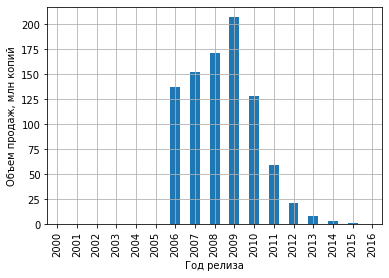

In [48]:

top_year_of_release['Wii'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid = True).set(
    xlabel = 'Год релиза', ylabel = 'Объем продаж, млн копий')

Резкий старт продаж с последующим постоянным ростом на протяжении 4 лет, после чего откат откат на уровень года релиза и последующий резкий спад продаж

*Вывод по анализу продаж игр по платформам*
- За все время жизни платформы можно выделить заметный скачок продаж в течении года, а затем рост продаж и удержание пика на протяжении 5-ти лет. После чего заметен спад и угасание. Распределение может зависеть от времени, в котором выпущена коонсоль, развития технологий, инноваций  
- Так на примере топ-5 платформ лидеров (от компаний Sony, Microsoft и Nintendo)) по продажам можно заметить, что запуск платформы, рост и спад совпадали у конкурирующих компаний

### Построение прогноза на 2017 год. Определение актуального периода

Рассчет среднего время жизни платформы 

In [49]:

sum_platform = 0
count_platform = 0
for name in top_year_of_release.columns:
    sum_platform += top_year_of_release.loc[top_year_of_release[name].notna(), name].count()
    count_platform += 1
    
mean_ttl = sum_platform/count_platform
print('Среднее время жизни платформы', mean_ttl) 


Среднее время жизни платформы 11.2


In [50]:
data['year_of_release'].describe()

count    16223.000000
mean      2006.787524
std          5.301364
min       1991.000000
25%       2003.000000
50%       2008.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Рассчет актуального периода жизни пратформы (активная прибыль)

In [51]:

sum_platform = 0
count_platform = 0
for name in top_year_of_release.columns:
    sum_platform += top_year_of_release.loc[top_year_of_release[name].notna(), name].count()
    count_platform += 1
    
QQQ_ttl = sum_platform*0.75/count_platform
print('Актуальное время жизни платформы', QQQ_ttl)

# Актуальность решил рассчитать исходя из расчета 3/4 всего распределения времени платформы

Актуальное время жизни платформы 8.4


Исходя из подисчитаного среднего срока жизни платформа и рассчитаного актуального периода, можно установить актуальный период - с 2008 по 2016 годы

Можно сделать срез данных по актальному времени 

In [52]:
# Берем сред данных за актуальный период

data_actual = data.query('year_of_release >= 2014')
data_actual


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,нет рейтинга,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,нет рейтинга,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,нет рейтинга,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,нет рейтинга,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,нет рейтинга,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,нет рейтинга,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,нет рейтинга,0.01


### Анализ платформ по лидерству продаж, рост или падение. Выбор нескольких потенциально прибыльных платформ

In [53]:
platform_actual = data_actual['platform']
platform_actual


31       PS4
42       PS4
47       3DS
77       PS4
87       PS4
        ... 
16703    PSV
16707    PSV
16710    PS3
16712    PSV
16714    PSV
Name: platform, Length: 1689, dtype: object

Text(0, 0.5, 'Объем продаж')

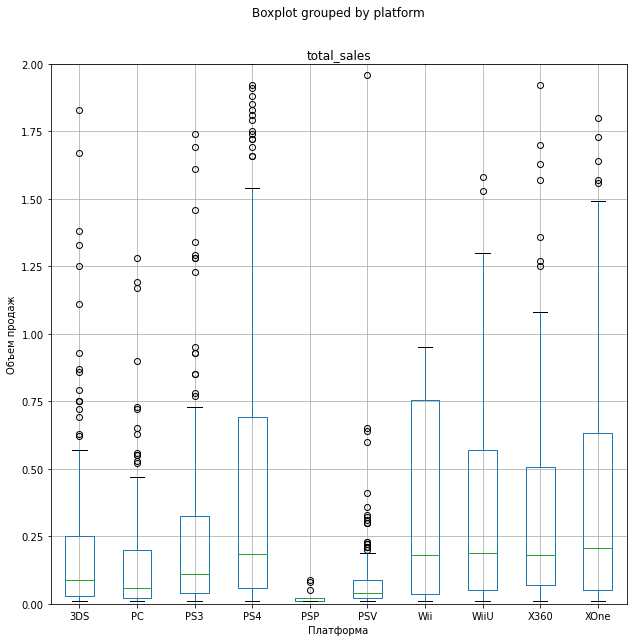

In [54]:
# Объем продаж за период 2014-2016 годы 

data_actual.query('platform in @platform_actual').boxplot(
                column = 'total_sales', by = 'platform', figsize = (10, 10)).set(ylim = (0, 2))
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')



На графике распределения мы можем наблюдать самые большие медианные и пиковые значения у PS3, PS4, X360 и XOne

Следующим шагом будет шрупировка по платформам, обратив внимание, на график продаж/прибыли по годам

In [55]:

data_actual_svod = data_actual.query('platform in @platform_actual').pivot_table(
                       index = 'year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')
data_actual_svod

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


[Text(0.5, 0, 'Год продаж'),
 Text(0, 0.5, 'Объем продаж'),
 Text(0.5, 1.0, 'Объем продаж по годам за актуальный период')]

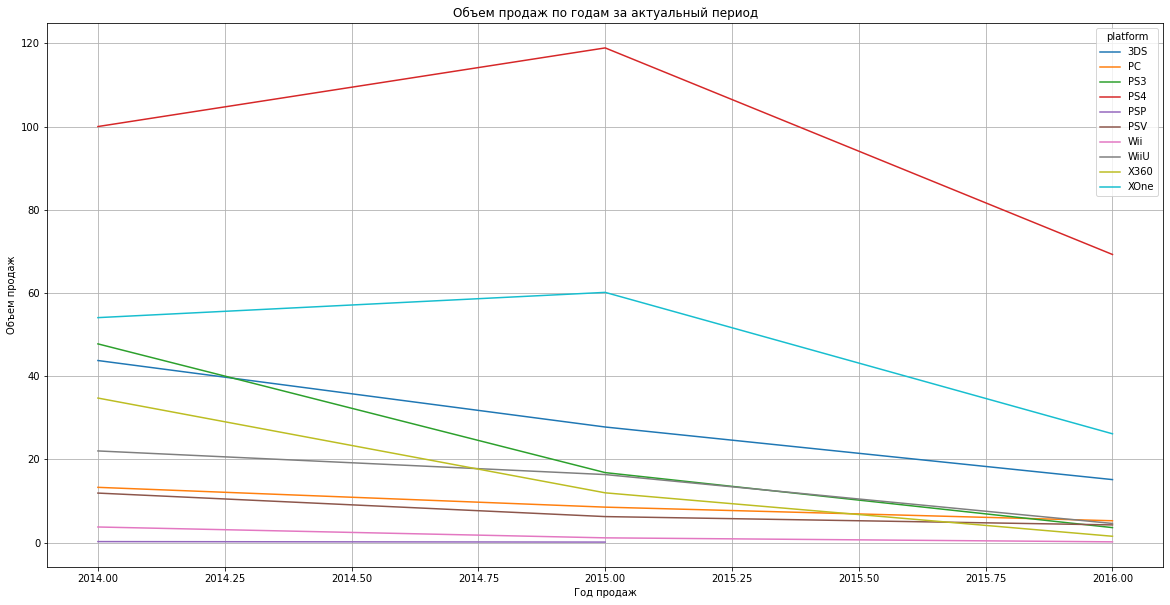

In [56]:

data_actual_svod.plot(grid = True, figsize = (20, 10)).set(
    xlabel = 'Год продаж', ylabel = 'Объем продаж', title = 'Объем продаж по годам за актуальный период')

*Промежуточный вывод*

- За взятый период видно, как угасала жизнь одних консолей и возрождалась других. Можно заметить, что выход нового поколения консоли или платформы, отражается на предыдущих - приходит спад с последующим угасанием/

- Так актуальное время консоли составляет 8-9 лет, при ее пике популярности и доходности длительностью в 5 лет

- Глядя на графики, стоит отметить, что игровой рынок на конец 2016 года нахоится на спаде. Новых платформ, набирающих популярность нет, но все еще есть платформы, "держащиеся наплаву" - PS4, XOne, 3DS

### Анализ по глобальным продажам игр в разбивке по платформам. Выявление и подсчем корреляций 

#### Построим сводную таблицу с кореляцией оценок пользователей и критиков на разных платформах

In [57]:
# Обновление актуальных данных 

platform_info = data_actual.groupby('platform')['total_sales'].agg(['count', 'sum']).sort_values(
    by='sum', ascending = False).reset_index()


In [58]:

# Этот блок кода выполняется с ошибкой, однако сводная таблица строится, в следующем блоке 
# попробовал завернуть этот код в конструкцию try: except:, однако ошибка остается, а вывода нет, поэтому решил оставить оба варианта
# в будущем необходим дебаг

corr_platform_actual = platform_info.query('platform in @platform_actual')
corr_platform_actual['user_corr'] = 0
corr_platform_actual['critic_corr'] = 0


for name in corr_platform_actual['platform']:
    corr_platform_actual.loc[corr_platform_actual['platform'] == name, ['user_corr']] = data_actual.query(
        'platform == @name')['total_sales'].corr(data_actual.query('platform == @name')['user_score'])
    corr_platform_actual.loc[corr_platform_actual['platform'] == name, ['critic_corr']] = data_actual.query(
        'platform == @name')['total_sales'].corr(data_actual.query('platform == @name')['critic_score'])
corr_platform_actual

,platform,count,sum,user_corr,critic_corr
0,PS4,376,288.15,-0.040132,0.402661
1,XOne,228,140.36,-0.070384,0.428677
2,3DS,212,86.68,0.215193,0.314117
3,PS3,219,68.18,-0.166761,0.446575
4,X360,111,48.22,-0.138445,0.525723
5,WiiU,73,42.98,0.407926,0.370201
6,PC,151,27.05,-0.071597,0.174634
7,PSV,295,22.40,-0.168455,0.042665
8,Wii,11,5.07,1.000000,NaN
9,PSP,13,0.36,NaN,NaN


In [59]:
try:    
    corr_platform_actual = platform_info.query('platform in @platform_actual')
    corr_platform_actual['user_corr'] = 0
    corr_platform_actual['critic_corr'] = 0


    for name in corr_platform_actual['platform']:
        corr_platform_actual.loc[corr_platform_actual['platform'] == name,['user_corr']] = data_actual.query(
            'platform == @name')['total_sales'].corr(data_actual.query('platform == @name')['user_score'])    
        corr_platform_actual.loc[corr_platform_actual['platform'] == name,['critic_corr']] = data_actual.query(
            'platform == @name')['total_sales'].corr(data_actual.query('platform == @name')['critic_score'])
    corr_platform_actual
except:
    pass

#### Построим графики корреляции продаж и года релиза

Корреляция продаж от года релиза -0.12



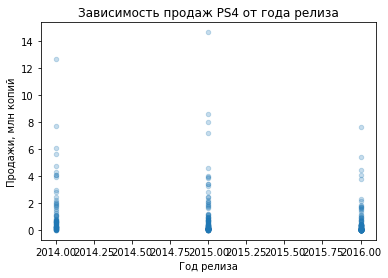

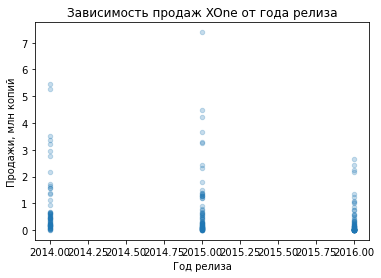

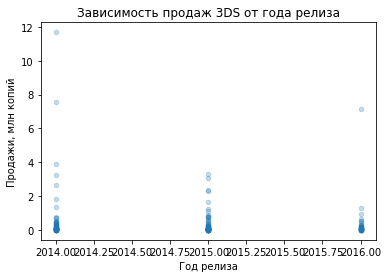

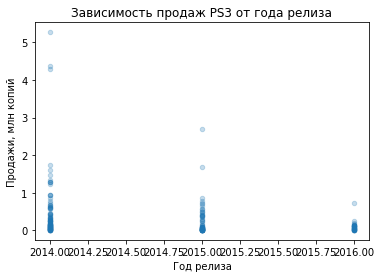

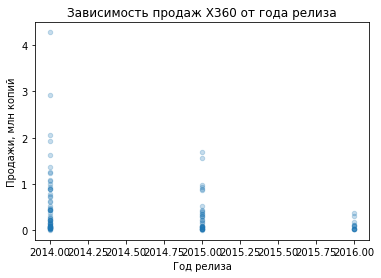

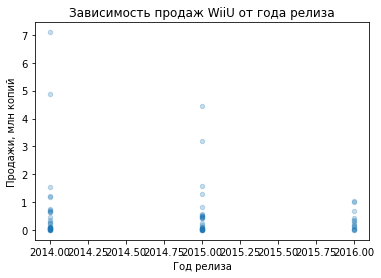

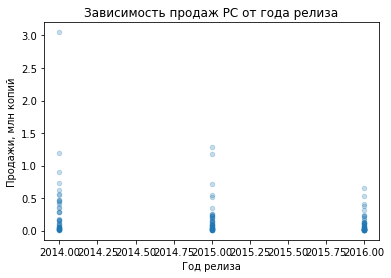

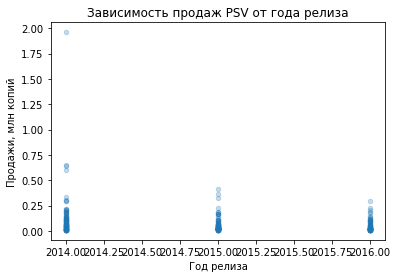

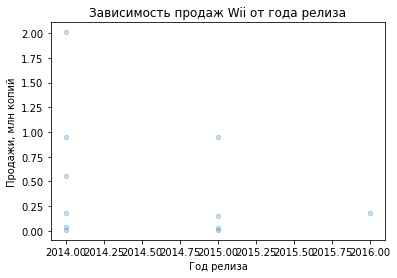

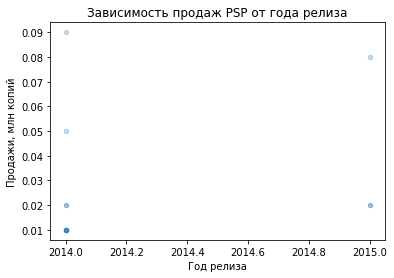

In [60]:

print('Корреляция продаж от года релиза', (data_actual['year_of_release'].corr(data_actual['total_sales'])).round(2))
print()
for name in corr_platform_actual['platform']:
    data_actual.query('platform == @name').plot(x = 'year_of_release', y = 'total_sales', kind = 'scatter', alpha = .25,
                       title = f'Зависимость продаж {name} от года релиза').set(
                       xlabel =  'Год релиза', ylabel='Продажи, млн копий')
    



#### Построим графики корреляции продаж и оценки критиков

In [61]:
data.year_of_release.min()

1991

In [62]:
data_actual.year_of_release.min()

2014

Корреляция продаж от оценки критиков 0.25



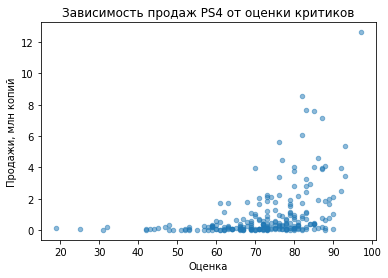

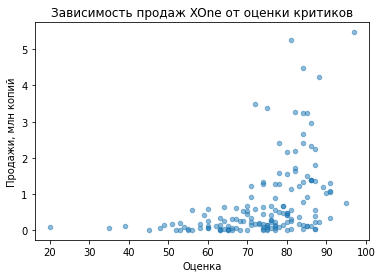

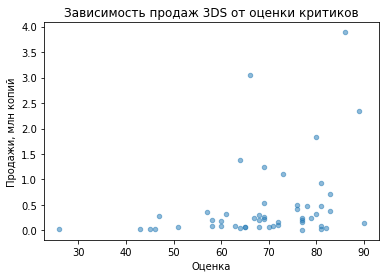

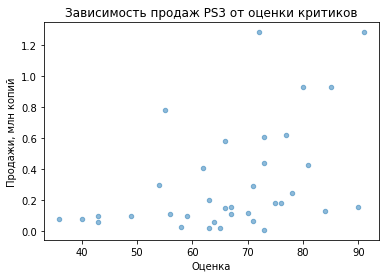

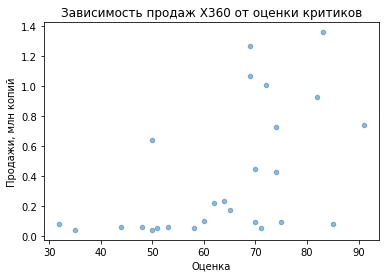

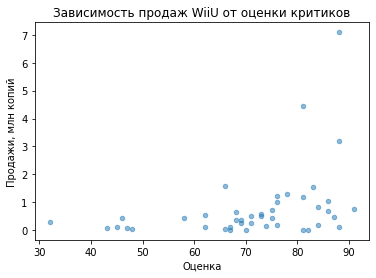

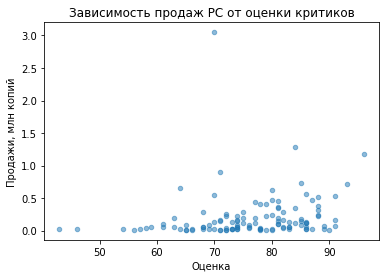

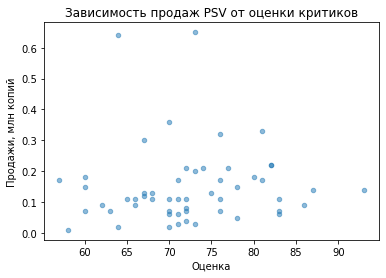

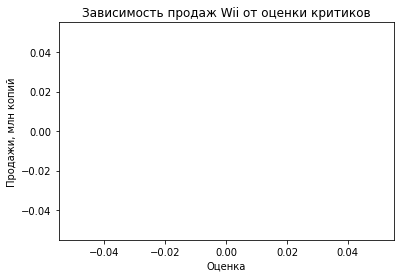

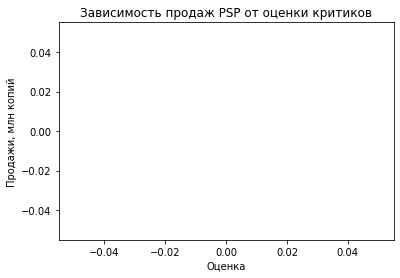

In [63]:
print('Корреляция продаж от оценки критиков', (data['critic_score'].corr(data['total_sales'])).round(2))
print()
# in corr_platform_actual 
# in data
for name in corr_platform_actual['platform']:
    data_actual.query('platform == @name and year_of_release >= 2014').plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', alpha = .5,
                       title = f'Зависимость продаж {name} от оценки критиков').set(
                       xlabel =  'Оценка', ylabel = 'Продажи, млн копий')
    



3DS


user_score     0.215193
total_sales    1.000000
Name: total_sales, dtype: float64

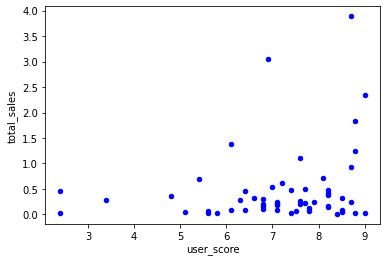

critic_score    0.314117
total_sales     1.000000
Name: total_sales, dtype: float64

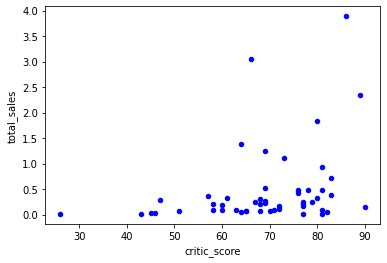

PC


user_score    -0.071597
total_sales    1.000000
Name: total_sales, dtype: float64

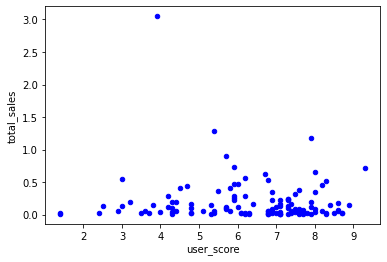

critic_score    0.174634
total_sales     1.000000
Name: total_sales, dtype: float64

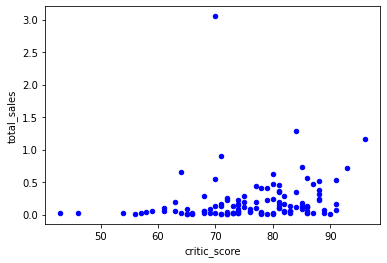

PS3


user_score    -0.166761
total_sales    1.000000
Name: total_sales, dtype: float64

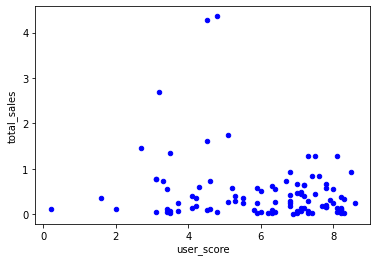

critic_score    0.446575
total_sales     1.000000
Name: total_sales, dtype: float64

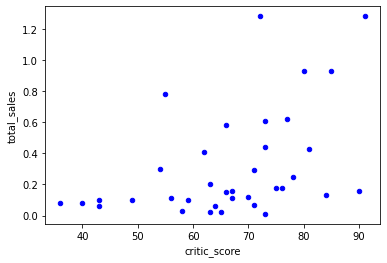

PS4


user_score    -0.040132
total_sales    1.000000
Name: total_sales, dtype: float64

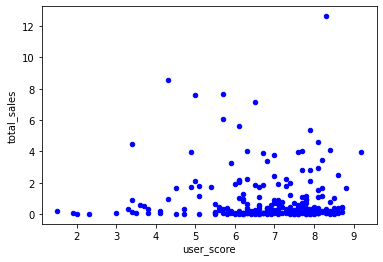

critic_score    0.402661
total_sales     1.000000
Name: total_sales, dtype: float64

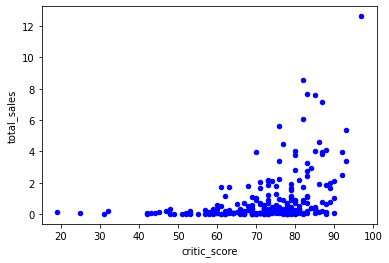

PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
PSV


user_score    -0.168455
total_sales    1.000000
Name: total_sales, dtype: float64

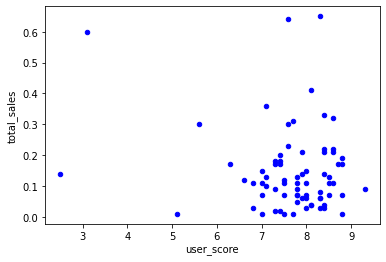

critic_score    0.042665
total_sales     1.000000
Name: total_sales, dtype: float64

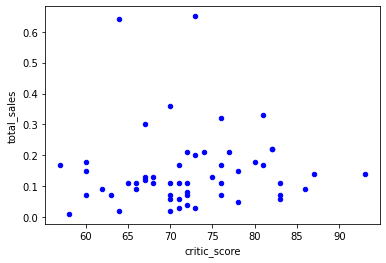

Wii
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
WiiU


user_score     0.407926
total_sales    1.000000
Name: total_sales, dtype: float64

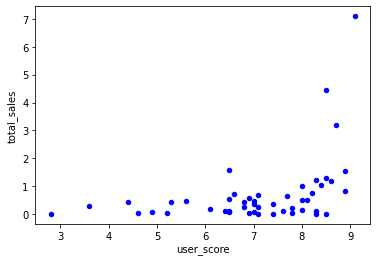

critic_score    0.370201
total_sales     1.000000
Name: total_sales, dtype: float64

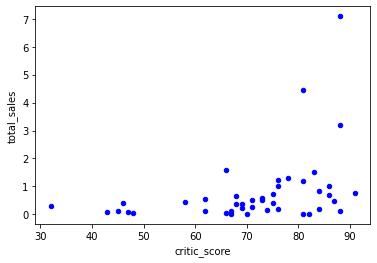

X360


user_score    -0.138445
total_sales    1.000000
Name: total_sales, dtype: float64

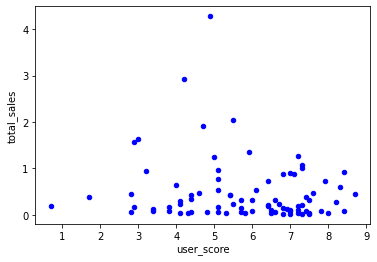

critic_score    0.525723
total_sales     1.000000
Name: total_sales, dtype: float64

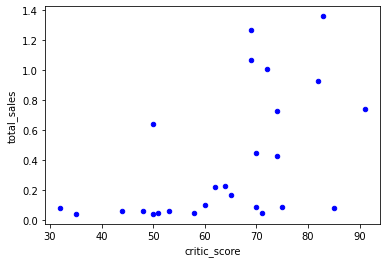

XOne


user_score    -0.070384
total_sales    1.000000
Name: total_sales, dtype: float64

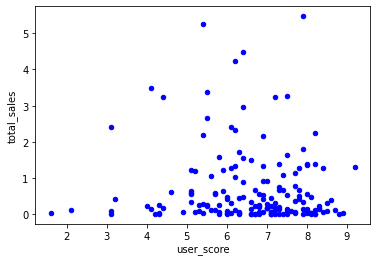

critic_score    0.428677
total_sales     1.000000
Name: total_sales, dtype: float64

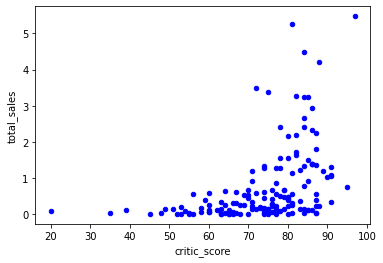

In [86]:
import matplotlib.pyplot as plt
df_sc, y = data_actual.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print(platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[games_on_pl['user_score'].notna() == True])
    not_critic = len(games_on_pl[games_on_pl['critic_score'].notna() == True])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl.plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[['user_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl.plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[['critic_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

Корреляция продаж от оценки критиков 0.25



Text(0.5, 1.0, 'Зависимость продаж PSP от оценки критиков')

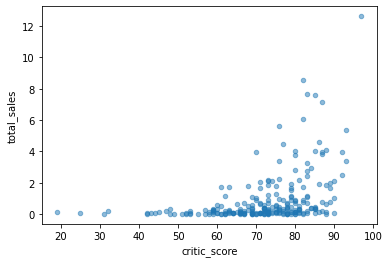

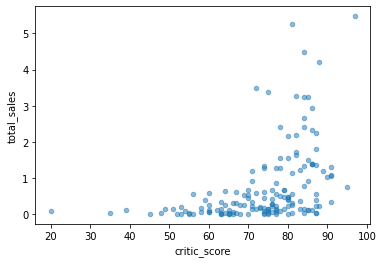

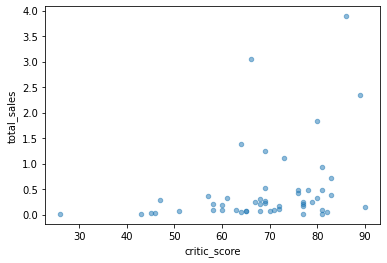

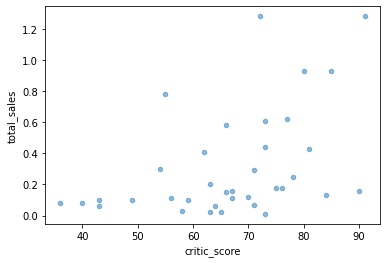

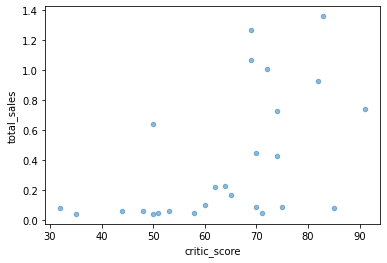

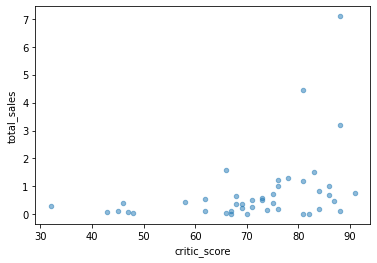

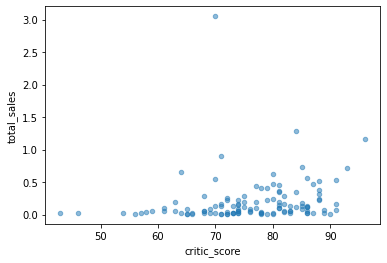

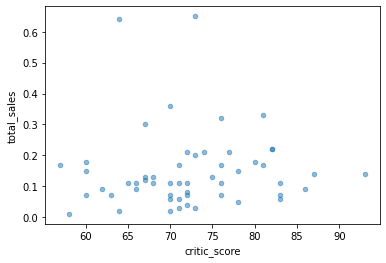

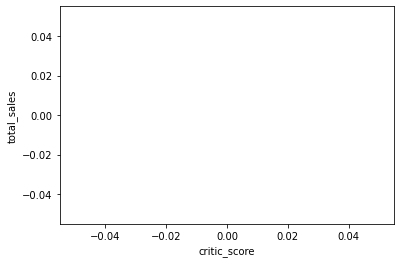

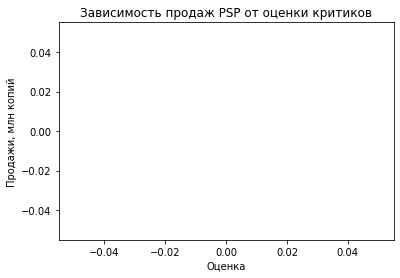

In [64]:


print('Корреляция продаж от оценки критиков', (data['critic_score'].corr(data['total_sales'])).round(2))
print()

# in corr_platform_actual 
# in data - 
# при построении графиков по всем платформам возникает предупреждение, что мы пытаемся вывести слишком много графиков через один цикл
# обойти это предупреждение не представляю возможным ввиду тонкостей платформы
# warnings.filterwarnings("ignore") - позволяет игнорировать предупреждение, но не выполнять код

for name in corr_platform_actual['platform']:
    data_actual.query('platform == @name and year_of_release >= 2014').plot(
        x = 'critic_score', y = 'total_sales', kind = 'scatter', alpha = .5)
plt.xlabel('Оценка')
plt.ylabel('Продажи, млн копий')
plt.title(f'Зависимость продаж {name} от оценки критиков')
    



#### Построим графики корреляции продаж и оценки пользователей

Корреляция продаж от оценки пользователей 0.09



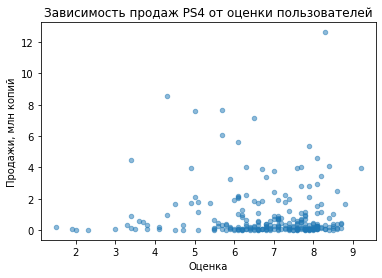

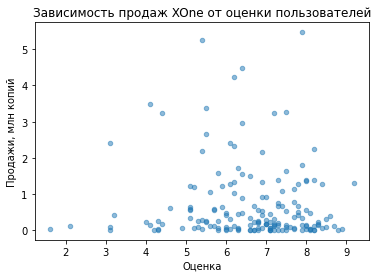

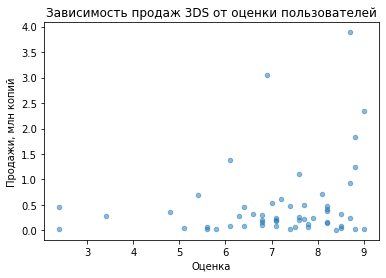

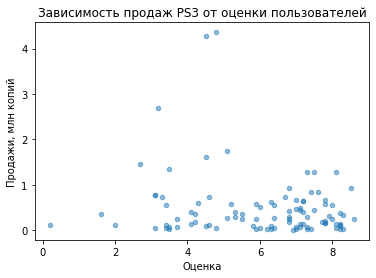

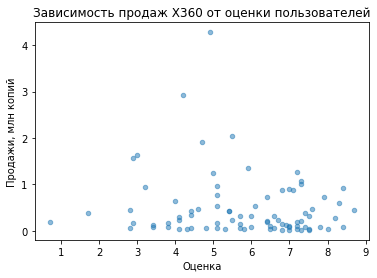

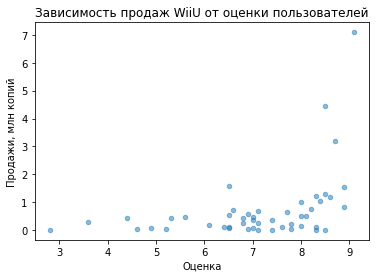

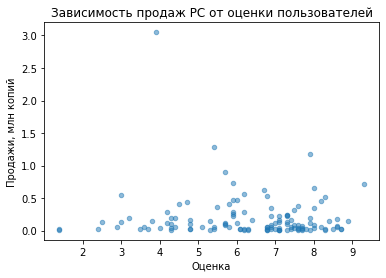

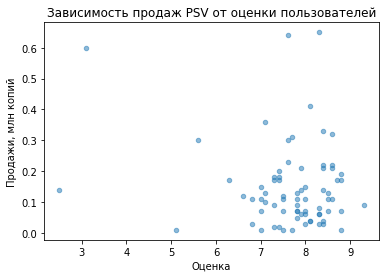

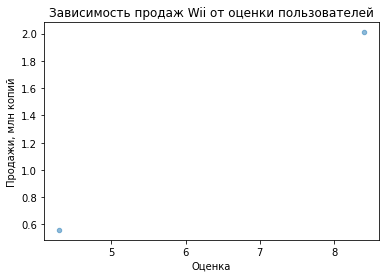

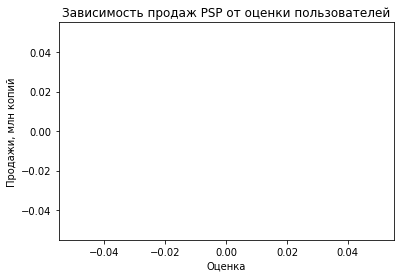

In [65]:


print('Корреляция продаж от оценки пользователей', (data['user_score'].corr(data['total_sales'])).round(2))
print()

# in corr_platform_actual 
# in data

for name in corr_platform_actual['platform']:    
    data_actual.query('platform == @name and year_of_release >= 2014').plot(x = 'user_score', y = 'total_sales', kind = 'scatter', alpha = .5,
                       title = f'Зависимость продаж {name} от оценки пользователей').set(
                       xlabel =  'Оценка', ylabel = 'Продажи, млн копий')
    



*Вывод о корреляции продаж и оценок пользоваттелей и критиков*

- Взаимосвязи между оценкой пользователей и продажами совершенно незначительная, значение корреляции незначительное и можно списать как погрешность, согласно Шкалы Чеддока
 
- Взаимосвязь между оценкой критиков и продажамимала, и можно заметить, где оценка критиков выше, там кол-во продаж больше, однако мы не можем утверждать, что высокие оценки критиков приводят к высоким показателям продаж, поскольку корреляция хоть и есть, но она слабая и не говорит о причинно-следственной связи

#### Построим графики распределения игр по жанрам

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
dtype: float64

[Text(0.5, 0, 'Жанр'),
 Text(0, 0.5, 'Объем продаж, млн копий'),
 Text(0.5, 1.0, 'Объем продаж игр по жанрам')]

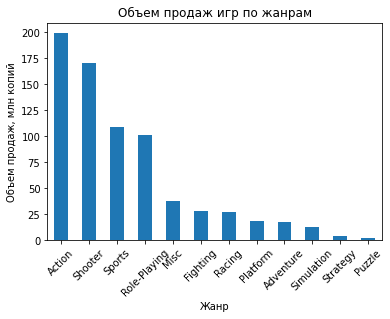

In [66]:
# Объем продаж игр по жанрам

genre_actual = data_actual.query('platform in @platform_actual').pivot_table(
                       index = 'genre', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum').sum(axis = 1).sort_values(ascending = False)
display(genre_actual)

genre_actual.plot(kind = 'bar', rot = 45).set(
    xlabel = 'Жанр', ylabel = 'Объем продаж, млн копий', title = 'Объем продаж игр по жанрам')


,genre,game_sum,total_sales
0,Action,619,199.36
1,Shooter,128,170.94
2,Sports,161,109.48
3,Role-Playing,221,101.44
4,Misc,113,37.55
5,Fighting,60,28.22
6,Racing,69,27.52
7,Platform,38,18.09
8,Adventure,185,17.55
9,Simulation,44,13.13


<AxesSubplot:title={'center':'Распределение объема продаж игр по жанрам'}, ylabel='total_sales'>

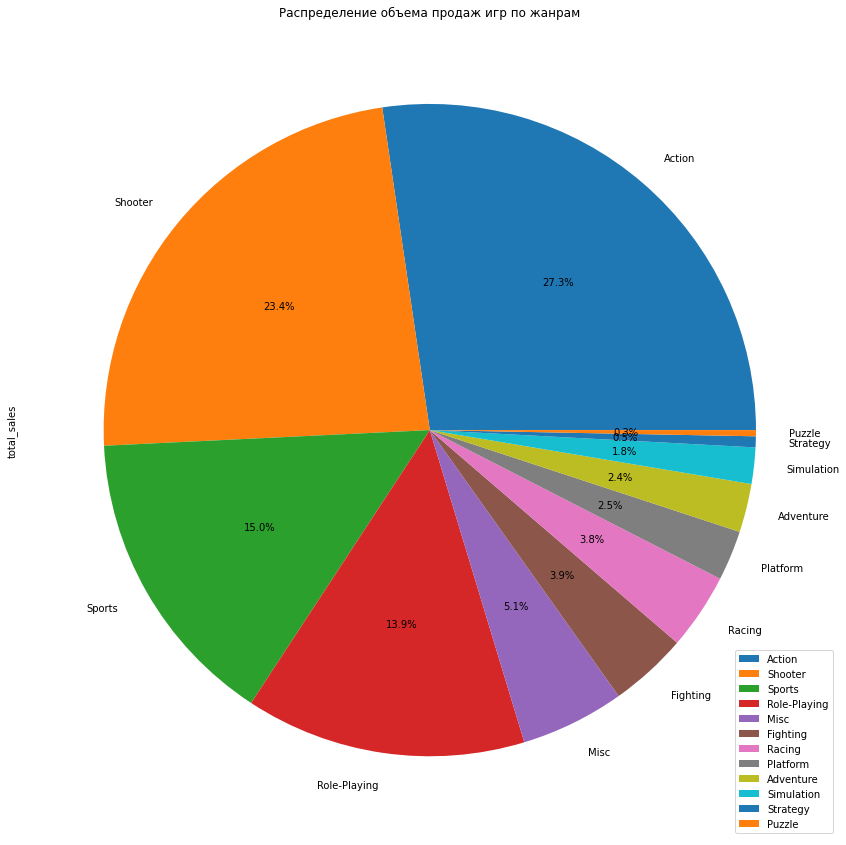

In [67]:
# Строим круговую диагрмму распределения продаж игр по жанрам
genre_actual_pie = data_actual.groupby('genre')['total_sales'].agg(
    ['count', 'sum']).sort_values(
    by='sum', ascending = False).reset_index()
genre_actual_pie.columns = ['genre', 'game_sum','total_sales',]
display(genre_actual_pie)

# Строим круговую диагрмму распределения (процентное соотношение) продаж игр по платформам
genre_actual_pie = genre_actual_pie.reset_index(drop=True)
genre_actual_pie.plot(kind = 'pie', y = 'total_sales', title = 'Распределение объема продаж игр по жанрам', figsize = (15,15), autopct='%.1f%%', labels = genre_actual_pie['genre'])

In [68]:
# Продажи по жанрам - медианные значения за период 2014-2016 годы 

data_actual.query('platform in @platform_actual').pivot_table(
                       index = 'year_of_release', columns = 'genre', 
                       values = 'total_sales', aggfunc = 'sum')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


Text(0, 0.5, 'Объем продаж')

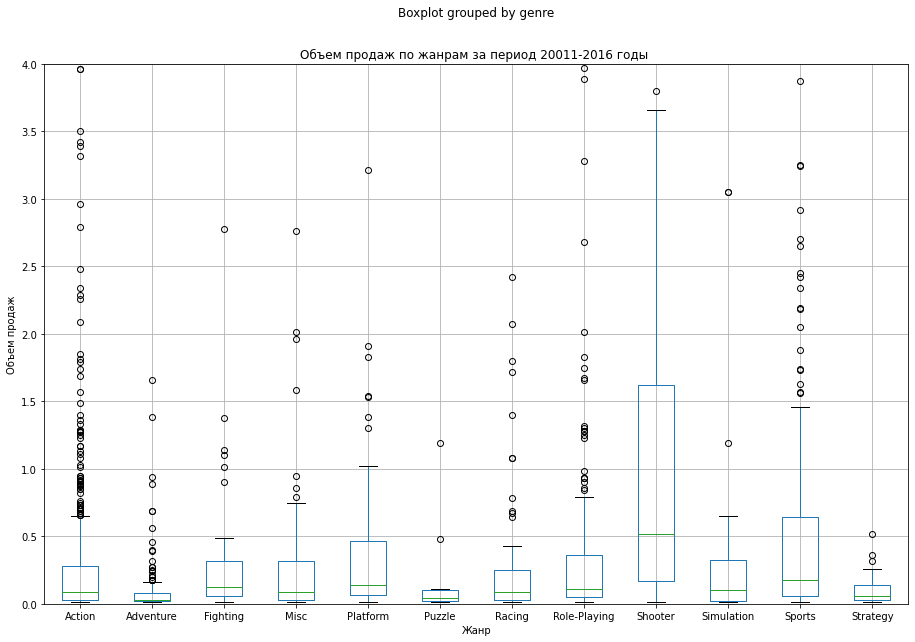

In [69]:
# Объем продаж по жанрам за период 2014-2016 годы 

data_actual.query('platform in @platform_actual').boxplot(
                column = 'total_sales', by = 'genre', figsize = (15, 10)).set(ylim = (0, 4))
plt.title('Объем продаж по жанрам за период 20011-2016 годы ')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')

что то мне подсказывает, что с течением времени средние и медианы могли меняться, выведем ка сводные таблицы с ними дополнителльно

In [70]:
# Продажи по жанрам - медианные значения

data_actual.query('platform in @platform_actual').pivot_table(
                       index = 'year_of_release', columns = 'genre',
                       values = 'total_sales', aggfunc = 'median')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,0.205,0.04,0.130,0.16,0.83,0.050,0.17,0.110,0.660,0.120,0.46,0.060
2015,0.070,0.03,0.100,0.19,0.10,0.045,0.15,0.105,0.925,0.200,0.12,0.045
2016,0.050,0.02,0.085,0.04,0.10,0.010,0.05,0.120,0.240,0.025,0.12,0.060


In [71]:
# Продажи по жанрам - средние значения

data_actual.query('platform in @platform_actual').pivot_table(
                       index = 'year_of_release', columns = 'genre', 
                       values = 'total_sales', aggfunc = 'mean')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,0.517181,0.074267,0.689130,0.556667,0.881000,0.212857,0.617037,0.512584,1.387447,0.507273,0.836111,0.122500
2015,0.284664,0.151111,0.376190,0.296667,0.465385,0.118333,0.448333,0.482564,1.985588,0.377333,0.692203,0.115625
2016,0.169157,0.068214,0.279375,0.081250,0.215333,0.010000,0.116250,0.336667,0.813191,0.105000,0.489375,0.086923


*Вывод о распределении продаж игр по жанрам:*

Наиболее перспективными жанрами для прогноза оказались Shooter, Sports, Platform и RPG. Однако самым прибыльным за актуальный период оказался Shooter, предсказуемое значение продаж которого показывает самые высокие показатели

### *Вывод этапа исследовательского анализа*

В ходе исследования были подсчитаны кореляции продаж и года выпуска игры, оценок пользователей и критиков, распределение игр по платформам, жанрам и годам. Были подсчитаны временной диапазоны жизни платформ и ее активный период развития. 
На основе данных анализа можно сделать прогноз на будущий год по некоторым направлениям и рынку игровой индустрии в целом.

Таким образом топ продаж занимают экшен и шутеры, развитыми консолями можно считать PS4 и XOne, однако последние годы наблюдается спад продаж в игровой индустрии: 
- это нормальное явление, и на примере предыдущих таких стагнаций, предшествует открытию (выходу) новой платформы (консоли), связанной с развитием технологии и разработки в сфере игровой индустрии 

## Составление портрета пользователя каждого региона

План этапа:
- Группировка данных по регионам и продажам о топ-5 платформам
- Исследование влияние рейтинга ESRB на продажи

### Групируем данные по регионам и продажам по топ 5 платформ

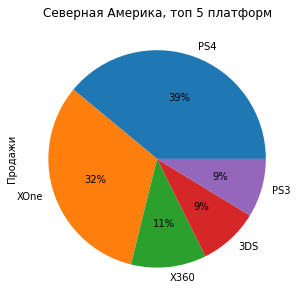

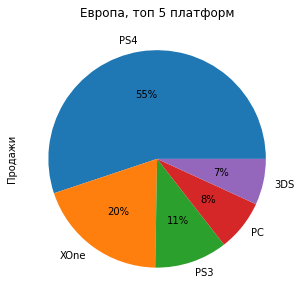

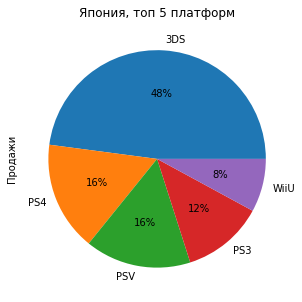

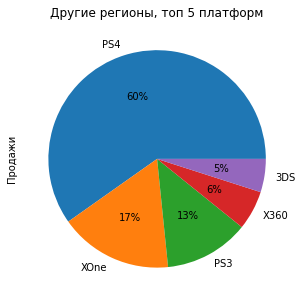

In [72]:
# Создаем список с актуальными платформами  
platform_actial_list = platform_actual.unique()


# Групируем данные по регионам и продажам по топ 5 платформ
# Создаем словарь для презентабельного отображения на графиках 

region_list = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония', 'other_sales': 'Другие регионы'}

for region in region_list:
    data_actual.query('platform in @platform_actial_list').pivot_table(
        index = 'platform', values = region, aggfunc = 'sum').sum(axis = 1).sort_values(ascending = False).head(5).plot(
        kind = 'pie', figsize = (5, 5), autopct = '%1.0f%%', title = f'{region_list[region]}, топ 5 платформ').set(
        ylabel = 'Продажи')
    plt.show()

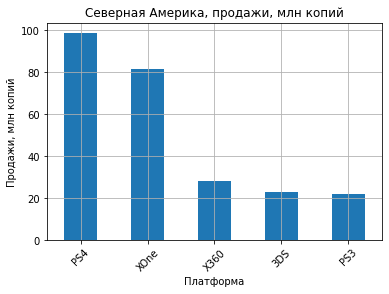

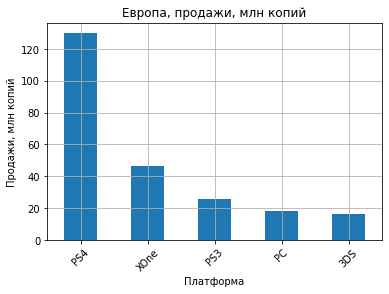

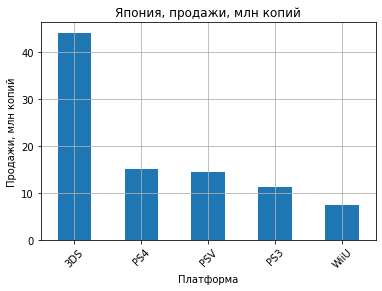

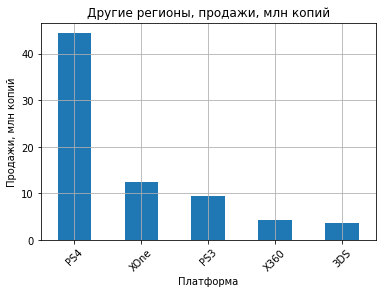

In [73]:
# Смотрим количественные значения продаж топ 5 платорм по регионам

for region in region_list:
    data_actual.query('platform in @platform_actial_list').pivot_table(
        index = 'platform', values = region, aggfunc = 'sum').sum(axis = 1).sort_values(ascending = False).head(5).plot(
        kind = 'bar', rot = 45, grid = True, title = f'{region_list[region]}, продажи, млн копий').set(
        xlabel = 'Платформа', ylabel = 'Продажи, млн копий')
    plt.show()

*Вывод о распределении предпочтений консолей по регионам

- По графикам видно, что первое место по платформам во всех регионах, кроме Японии, занимает PS4, второе место достается Xbox One  
- В Японии же топ занимает 3DS, затем с большим отрывом идут остальные консоли - PS4, PSV, PS3, WiiU

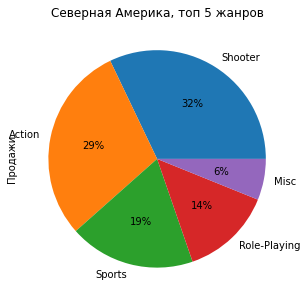

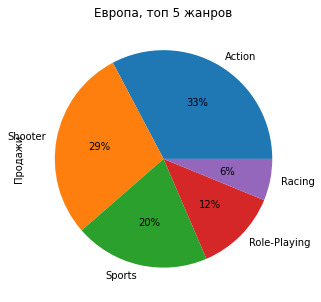

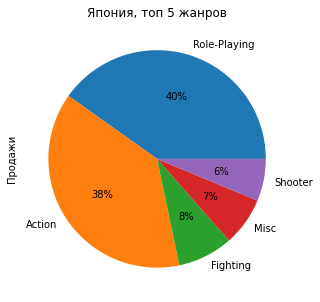

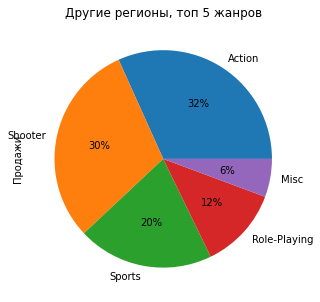

In [74]:
# Смотрим топ 5 популярных жанров по регионам 

for region in region_list:
    data_actual.query('platform in @platform_actial_list').pivot_table(
        index = 'genre', values = region, aggfunc = 'sum').sum(axis = 1).sort_values(ascending = False).head(5).plot(
        kind = 'pie', figsize = (5, 5), autopct = '%1.0f%%', title = f'{region_list[region]}, топ 5 жанров').set(
        ylabel = 'Продажи')
    plt.show()

*Вывод о распределении предпочтений игр по жанрам по регионам:*
- И снова предпочтения всех регионов, заисключением Японии схожи - на этот раз по жанрам игр, так топ-3 занимают Экшен, Шутер и Спортивные симуляоры

- В Японии первенство занимают RPG игры - почти наравне с Action, затем уже с большим отставанием идут шутеры, файтинги и смешаные жанры 

### Влияние рейтинга ESRB на продажи в регионах

*Влияние рейтинга ESRB на продажи в регионах*

In [75]:
data_actual['rating'].unique()

array(['нет рейтинга', 'M', 'E', 'T', 'E10+'], dtype=object)

Для удобства можно создать описание-подсказку по обозначению рейтинга:

- 'E' - 'E 6+'  
- 'T' - 'T 13+'  
- 'M' - 'M 17+'  


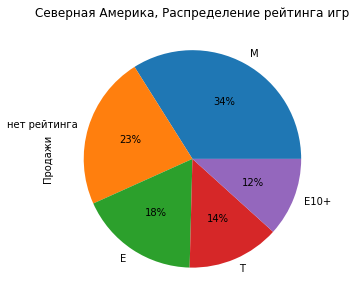

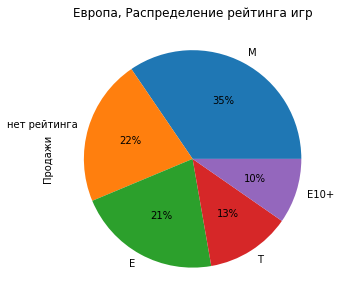

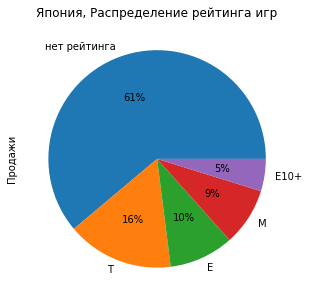

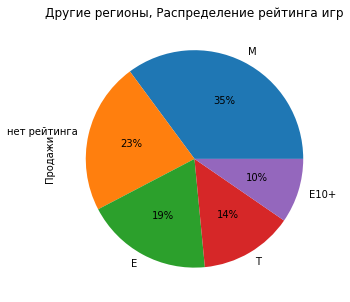

In [76]:
# Смотрим продажи игр по рейтингу в разных регионах

for region in region_list:
    data_actual.query('platform in @platform_actial_list').pivot_table(
        index = 'rating', values = region, aggfunc = 'sum').sum(axis = 1).sort_values(ascending = False).head(5).plot(
        kind = 'pie', figsize = (5, 5), autopct = '%1.0f%%', title = f'{region_list[region]}, Распределение рейтинга игр').set(
        ylabel='Продажи')
    plt.show()
    



*Вывод о распределении предпочтений игр по рейтингу ESRB по регионам:*
- Распределение игр по рейтингу ESRB во всех регионах схожи и здесь: большую треть занимают игры с рейтингм М (17+), затем без рейтинга, Е, Т и Е10+   
- В Японии же больше половины всех продаж приходится на игры без рейтинга.  
- Второе место по популярности игр без рейтинга в отличных от Японии регионах можно обусловить тем, что на эту долю приходятся продажи популярных Японских RPG игр, а ESRB рейтинг для этого региона не рассчитывается  


### *Вывод по портретам пользователей регионов*

В ходе исследования региональных особенностей игрового рынка были выявлены следующие положения: 
1. Лидирующими консолями во всех регионах (кроме Японии) можно считать PS4 и XOne  
2. Лидирующими жанрами в этих регионах стали Шутеры, экшен и спортивные симуляторы  
3. Рейтинг ESRB выбора игр таков, что почти в равных количествах состоят игры с рейтингом M (+17) и без рейтинга, затем E (+6), средневозрастные T (13+)  
4. Показатели данных по Японии стоит выделить отдельно, так как похоже, что там сформировалась своя игровая культура, немного не похожая на предпочтения остальных регионов:

    4.1 Предпочтения среди консолей отдается 3DS
    
    4.2 Преемущественный распространенный жанр игр - RPG, почти наравне с Экшеном
    
    4.3 Если смотреть на рейтинг подбора игр - то большинство игр (61%) без рейтинга, затем идут подростковые 16% (13+) и детские 10% (6+)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Text(0.5, 1.0, 'Рспределение оценки пользователей по платформам')

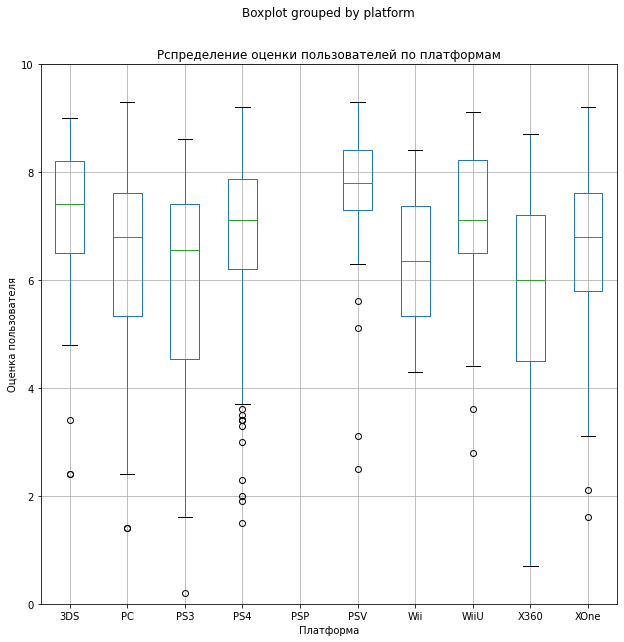

In [78]:
# Смотрим выбросы значений и рассчитываем дисперсии для определения критерия для проверки гипотезы


data_actual.query('platform in @platform_actual').boxplot(
                column = 'user_score', by = 'platform', figsize = (10, 10)).set(ylim = (0, 10))
plt.xlabel('Платформа')
plt.ylabel('Оценка пользователя')
plt.title('Рспределение оценки пользователей по платформам')


In [79]:
# Оценки пользователей по жанрам и платформам - средние значения

data_actual.query('platform in @platform_actual and (platform == "XOne" or platform =="PC")').pivot_table(
                       index = 'genre', columns = 'platform',
                       values = 'user_score', aggfunc = 'mean')

platform,PC,XOne
genre,,
Action,6.366667,6.703636
Adventure,8.075000,7.550000
Fighting,4.000000,7.200000
Misc,NaN,7.060000
Platform,4.400000,5.625000
Racing,6.250000,6.692857
Role-Playing,6.864706,7.522222
Shooter,6.227778,6.637931
Simulation,6.093750,6.300000


In [80]:
# Взяли срез по оценкам пользователей без пропусков 
XOne = data_actual.query('platform == "XOne" and user_score.notnull()')['user_score']
PC = data_actual.query('platform == "PC" and user_score.notnull()')['user_score']

# Смотрим равны ли выборки
if (XOne.shape[0] == PC.shape[0]):
    print('выборки равны')
else:
    print(f'{XOne.shape[0]} и {PC.shape[0]} выборки не равны')

# Смотрим равны ли дисперсии
#print("Дисперсия выборки xone", np.var(XOne['user_score']))
#print("Дисперсия выборки pc", np.var(PC['user_score']))

XOne_disp = (np.var(XOne)).round(2)
PC_disp = (np.var(PC)).round(2)

if (XOne_disp == PC_disp):
    print('Дисперсии равны')
else:
    print(f'{XOne_disp} и {PC_disp} дисперсии не равны')

165 и 122 выборки не равны
1.88 и 2.88 дисперсии не равны


*Поскольку выборки независымые, не равны, и дисперсии их различаются, для рассчета p значения применим t критерий Стьюдента*

In [81]:
# рассчитываем p значение с применением t критерия Стьюдента 

result = st.ttest_ind(XOne, PC)
alpha = .05

print('p значение:', result.pvalue)

p значение: 0.10450507919348415


С большой долей вероятности значимого различия между средними пользовательскими рейтингами платформ Xbox One и PC

Вывод: *Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, подтверждена*

### Средние пользовательские рейтинги жанров Action и Sports разные

Н0: средние пользовательские рейтинги жанров Action и Sport равны
    
Н1: средние пользовательские рейтинги жанров Action и Sport не равны

Text(0.5, 1.0, 'Рспределение оценки пользователей по жанрам')

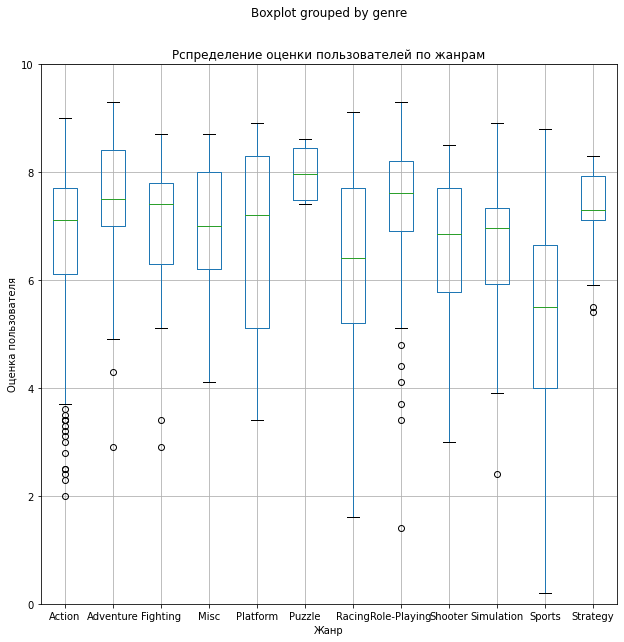

In [82]:
# Смотрим выбросы значений и рассчитываем дисперсии для определения критерия для проверки гипотезы

data_actual.query('platform in @platform_actual').boxplot(
                column = 'user_score', by = 'genre', figsize = (10, 10)).set(ylim = (0, 10))
plt.xlabel('Жанр')
plt.ylabel('Оценка пользователя')
plt.title('Рспределение оценки пользователей по жанрам')


*Присутствуют вбросы*

In [83]:
# Оценки пользователей по жанрам и платформам - средние значения

data_actual.query('platform in @platform_actual and (genre == "Action" or genre =="Sports")').pivot_table(
                       index = 'platform', columns = 'genre',
                       values = 'user_score', aggfunc = 'mean')

genre,Action,Sports
platform,,
3DS,6.582609,5.300000
PC,6.366667,4.818182
PS3,6.392857,4.447619
PS4,6.913953,5.818421
PSV,7.470370,6.300000
Wii,NaN,4.300000
WiiU,6.895833,6.150000
X360,6.500000,4.273684
XOne,6.703636,5.626667


In [84]:
# Берем срез по жанрам Action и Sports без пропусков
action = data_actual.query('genre == "Action" and user_score.notnull()')['user_score']
sport = data_actual.query('genre == "Sports" and user_score.notnull()')['user_score']


# Смотрим равны ли выборки
if (action.shape[0] == sport.shape[0]):
    print('выборки равны')
else:
    print(f'{action.shape[0]} и {sport.shape[0]} выборки не равны')

# Смотрим равны ли дисперсии
action_disp = (np.var(action)).round(2)
sport_disp = (np.var(sport)).round(2)

if (action_disp == sport_disp):
    print('Дисперсии равны')
else:
    print(f'{action_disp} и {sport_disp} дисперсии не равны')
    
    

297 и 127 выборки не равны
1.89 и 3.42 дисперсии не равны


*Поскольку выборки независымые, не равны, и дисперсии их различаются, для рассчета p значения применим t критерий Стьюдента*

In [85]:
# рассчитываем p значение с применением t критерия Стьюдента 

result = st.ttest_ind(action, sport)
alpha = .05


print('p значение:', result.pvalue)


p значение: 2.8711147985105864e-19


Различие значимо, и это значит, что средние пользовательские рейтинги отличаются

Вывод: *Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sport не равны, подтверждена*

### *Вывод по разделу гипотез*

Для проверки отработки гипотез решил использовать t критерий Стьюдента. 

Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports различаются

## Общий вывод

Для анализа были представлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы за 1980-2016 годы.

Во время предобработки данных: 
наименования стоблцов приведены к нижнему регистру
удалены строки с пропусками данных в столбцах name, rating и year_of_release
значения столбца user_score, равные 'tbd' заменено на значения пропусков nan
пропуски значений столбца rating заменены на значение 'нет рейтинга'

В результате анализа были подсчитаны продажи по годам, жанрам, платформам и регионам. Топ 5 платформ за все время занимают PS2, X360, PS3, Wii, DS.
Был подсчитан цикл жизни платформы: актуальное время составляет 8-9 лет, при ее пике популярности и доходности длительностью в 5 лет, после чего, как правило, происходит смена - выход новой консоли, часто связанный с развитием новых технологий

На основе данных анализа можно сделать прогноз на будущий (2017) год по некоторым направлениям и рынку игровой индустрии в целом. Таким образом топ продаж занимают экшен, шутеры и спортивные симуляторы, развитыми консолями можно считать PS4 и XOne.

Взаимосвязь между оценкой критиков и продажами хоть и есть, но она мала. Утверждать, что высокие оценки критиков приводят к высоким показателям продаж нельзя. Корреляция слабая и не говорит о причинно-следственной связи.

Наиболее перспективным игровым жанром стоит считать Shooter 

Если рассматривать рынок игровой индустрии через призму регионов, то можно обнаружить нектоторые особенности: 

1. Самые популярные жанры практически во всех регионах - Action, Shooter, Sports, в Японии - RPG и Action  
2. Мировой рынок, заисключением Японии, предпочитает разработки Microsoft, Sony и Nintendo - это X360, XOne, PS3, PS4, Wii. Япония же сперва предпочитает более портативные платформы - 3DS, затем с большим отставанием и остальные консоли   
3. Практически во всех регионах, кроме Японии, распространен рейтинг игр по шкале ESRB - М (17+), E (6+), T (13+) и без рейтинга, в Японии же большинство игр без рейтинга, детские Е (6+) или подростковые T (13+)  


Виден потенциал рынка Европы и Америки на перспективных платформах PS4, XOne в жанрах Shooter. Показатели продаж по этим направлениям предсказуемы и показывают наибольшую вероятную прибыль, чего нельзя сказать об остальных регионах, где игровой рынок специфичен, и не так предсказуем  

В качестве выбора направления для выгодной разработки стоит отметить рынок Европы и Америки, а в качестве платформ стоит обратить внимание на Sony PlayStation 4 и Xbox One с жанром Action и Shooter, а рейтинг ESRB - M (17+) позволит достичь более высоких показателей в продажах